Segmentation
=======

In [1]:
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt

from skimage import data, segmentation, color
from skimage.future import graph

Original image
----------------

array([[[ 9, 15,  5],
        [ 8, 14,  4],
        [ 8, 14,  4],
        ..., 
        [ 5,  7,  6],
        [ 5,  7,  6],
        [ 6,  8,  7]],

       [[ 8, 14,  4],
        [ 7, 13,  3],
        [ 7, 13,  3],
        ..., 
        [ 5,  7,  6],
        [ 5,  7,  6],
        [ 5,  7,  6]],

       [[ 8, 14,  4],
        [ 7, 13,  3],
        [ 7, 13,  3],
        ..., 
        [ 4,  6,  5],
        [ 4,  6,  5],
        [ 5,  7,  6]],

       ..., 
       [[ 4,  4,  2],
        [ 4,  4,  2],
        [ 4,  4,  2],
        ..., 
        [ 9, 14,  8],
        [ 9, 14,  8],
        [10, 15,  9]],

       [[ 2,  4,  1],
        [ 3,  5,  2],
        [ 3,  5,  2],
        ..., 
        [10, 15,  9],
        [ 9, 14,  8],
        [ 8, 13,  7]],

       [[ 2,  4,  1],
        [ 2,  4,  1],
        [ 2,  4,  1],
        ..., 
        [ 8, 13,  7],
        [10, 12,  7],
        [ 9, 11,  6]]], dtype=uint8)

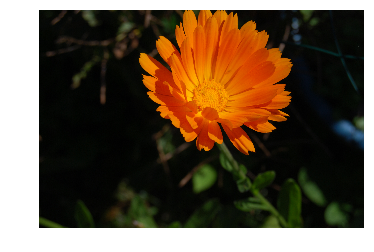

In [35]:
img = plt.imread('data/DSC_0055.JPG')
plt.imshow(img)
plt.axis('off')

img

Segmentation based on Mean shift
-----------------------------------

The kernel for segmentation
$$K_{h_s, h_r}(\mathbf{x}) = \frac{C}{{h^2_s} {h^p_r}}k(\|\frac{\mathbf{x}^s}{h_s}\|^2)k(\|\frac{\mathbf{x}^r}{h_r}\|^2)$$

In [31]:
def convert_img_vec(img_rgb):
    vecs = []
    img_Luv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2Luv)
    
    for x in range(img_Luv.shape[0]):
        for y in range(img_Luv.shape[1]):
            vecs.append(np.append([x, y], img_Luv[x, y, :]))
            
    return vecs

In [32]:
a = convert_img_vec(img)

In [39]:
img_o = np.array(a)
img_info = img_o[:, 2:5]
c = img_info.reshape(2592, 3872, 3)
cc = np.array(c, dtype='uint8')

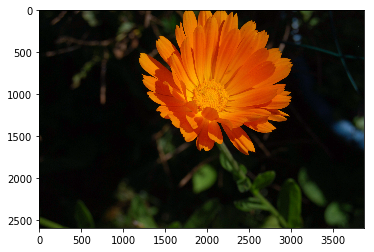

In [41]:
plt.imshow(cv2.cvtColor(cc, cv2.COLOR_Luv2RGB))

In [6]:
from mean_shift.mean_shift_utils import segmentation_kernel
from mean_shift.mean_shift import mean_shift as ms
from mean_shift.mean_shift_utils import euclid_distance

ms = ms(kernel = segmentation_kernel)

In [ ]:
r = ms.cluster(points=a, kernel_bandwidth=(8, 16))

Segmentation based on Normalized Cut
----------------------------------------

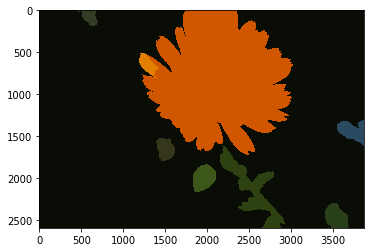

In [12]:
labels1 = segmentation.slic(img, compactness=30, n_segments=200)
g = graph.rag_mean_color(img, labels1, mode='similarity')
labels2 = graph.cut_normalized(labels1, g)
out = color.label2rgb(labels2, img, kind='avg')
plt.imshow(out)

In [19]:
plt.imsave('/home/jwu/Desktop/o.png', out)